In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

Suppose there is a Normal distribution with some `true_mu` and `true_std`, but you only have access to a single sample (of size=`sample_size`). 

The naive way to obtain estimate of the *true* stats is to calculate them on the sample directly.

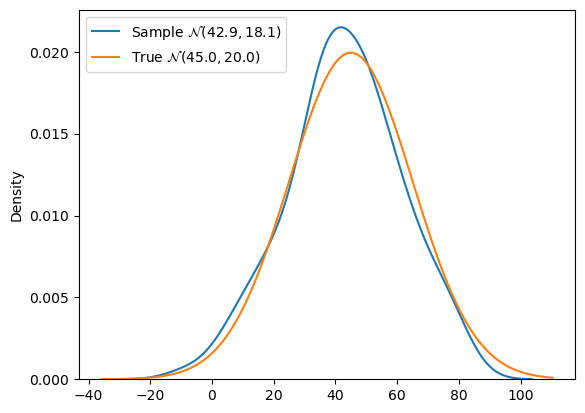

In [2]:
np.random.seed(42)

true_mu = 45
true_std = 20
sample_size = 100
samples = np.random.normal(true_mu, true_std, size=(sample_size,))
sample_mu = samples.mean()
sample_std = samples.std()

fig, ax = plt.subplots()
sns.kdeplot(
    samples,
    label="Sample $\\mathcal{N}(" + f"{sample_mu:.1f},{sample_std:.1f}" + ")$",
    ax=ax,
)

_range = ax.get_xlim()
xs = np.linspace(_range[0], _range[1], 100)
ys = norm.pdf(xs, loc=true_mu, scale=true_std)
ax.plot(
    xs,
    ys,
    label="True $\\mathcal{N}(" + f"{true_mu:.1f},{true_std:.1f}" + ")$",
)

ax.legend()

This approach is reasonable, for simple distributions but is not reliable for messy data, complex distributions, and is also *extremely* sensitive to sampling artifacts.

The most robust approach is to model the actual process probabilistically, validate this model against the observed data, and then use this model to formulate your desired metrics etc. But this can be very cumbersome. 

A more conservative approach is to utilize **bootstrap** sampling to simulate alternative samples to get a more robust estimate of the stats, along with some estimation of the error. This approach is still sensitive to sampling artifacts, but atleast you can somewhat quantify these issues.

# Estimating Mean

In [26]:
def get_ci(sample_stats: np.ndarray, ci: float) -> tuple[float, float]:
    assert 0 < ci <= 1
    d = 1 - ci
    s = d / 2
    return np.quantile(sample_stats, [s, 1 - s])

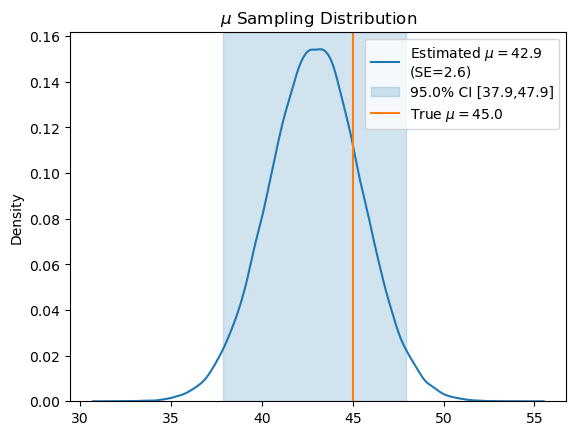

In [33]:
np.random.seed(42)

bootstrap_sample_size = 50
bootstrap_samples = 100000

sub_sampls = np.random.choice(
    samples,
    size=(bootstrap_samples, bootstrap_sample_size),
    replace=True,
)
sample_stats = sub_sampls.mean(axis=1)
sampled_mu = sample_stats.mean()
sampled_std = sample_stats.std()
_ci = 0.95
ci = get_ci(sample_stats, _ci)

fig, ax = plt.subplots()
sns.kdeplot(
    sample_stats,
    label="Estimated $\\mu=$" + f"{sampled_mu:.1f}\n" + f"(SE={sampled_std:.1f})",
    color="C0",
    ax=ax,
)

ax.axvspan(
    *ci,
    label=f"{_ci:.1%} CI [{ci[0]:.1f},{ci[1]:.1f}]",
    color="C0",
    alpha=0.2,
)

ax.axvline(
    x=true_mu,
    label="True $\\mu=" + f"{true_mu:.1f}$",
    color="C1",
)

ax.set(
    title="$\\mu$ Sampling Distribution",
)

ax.legend()


# Estimating Standard Deviation